<a href="https://colab.research.google.com/github/SHermukhammadjon/Classically_Punk/blob/main/classically_punk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# ! pip install numpy
# ! pip install pandas
# ! pip install matplotlib
# ! pip install seaborn
# ! pip install -U scikit-learn
# ! pip install tensorflow tensorflow-io
# ! pip install librosa
# ! pip install wget

# Classically Punk


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tarfile
import tensorflow as tf
import tensorflow_io as tfio
import os
from  IPython.display import Audio
import librosa
import librosa.display
import wget
from tqdm import tqdm

## 1. Load Dataset

### 1.1 Load Dataset  `(It takis to many time)`

In [9]:
def load_dataset(url):
  wget.download(url)
  print("Data set sucsefuly downloaded")

In [7]:
load_dataset("https://storage.googleapis.com/qwasar-public/track-ds/classically_punk_music_genres.tar.gz")

Data set sucsefuly downloaded


### 1.2 Opening the dataset

In [10]:
def open_dataset(file_path : str = "classically_punk_music_genres.tar.gz"):
  file = tarfile.open(file_path)
  file.extractall()
  file.close()
  print("Dataset Sucsefuly opened")

In [11]:
open_dataset("classically_punk_music_genres.tar.gz")

Dataset Sucsefuly opened


### Get Dataset audio file path as Pandas DatFrame

In [17]:
def colect_audios_path(floder : str):
  geners = [dr for dr in os.listdir(f"./{floder}") if '.' not in dr]
  data = {'file_path' : [], 'gener' : []}
  for gener in geners:
    for file in os.listdir(f"./{floder}/{gener}"):
      data['file_path'].append(f"./{floder}/{gener}/{file}")
      data['gener'].append(gener)
  return pd.DataFrame(data)

In [18]:
df = colect_audios_path("genres")
df

,file_path,gener
0,./genres/jazz/jazz.00054.wav,jazz
1,./genres/jazz/jazz.00064.wav,jazz
2,./genres/jazz/jazz.00044.wav,jazz
3,./genres/jazz/jazz.00087.wav,jazz
4,./genres/jazz/jazz.00052.wav,jazz
...,...,...
995,./genres/blues/blues.00077.wav,blues
996,./genres/blues/blues.00075.wav,blues
997,./genres/blues/blues.00014.wav,blues
998,./genres/blues/blues.00002.wav,blues


In [42]:
# CHecing our dataset balanced
df['gener'].value_counts()

jazz         100
disco        100
reggae       100
pop          100
metal        100
country      100
classical    100
rock         100
hiphop       100
blues        100
Name: gener, dtype: int64

In [43]:
df[df['gener'] == 'metal'].iloc[0,0]

'./genres/metal/metal.00074.wav'

In [51]:
metal = df[df['gener'] == 'metal'].iloc[0,0]
waw, sample_rate = librosa.load(metal)

In [45]:
waw

array([-0.00717163, -0.00680542,  0.00445557, ...,  0.00814819,
       -0.02844238, -0.02645874], dtype=float32)

In [50]:
sample_rate

22050

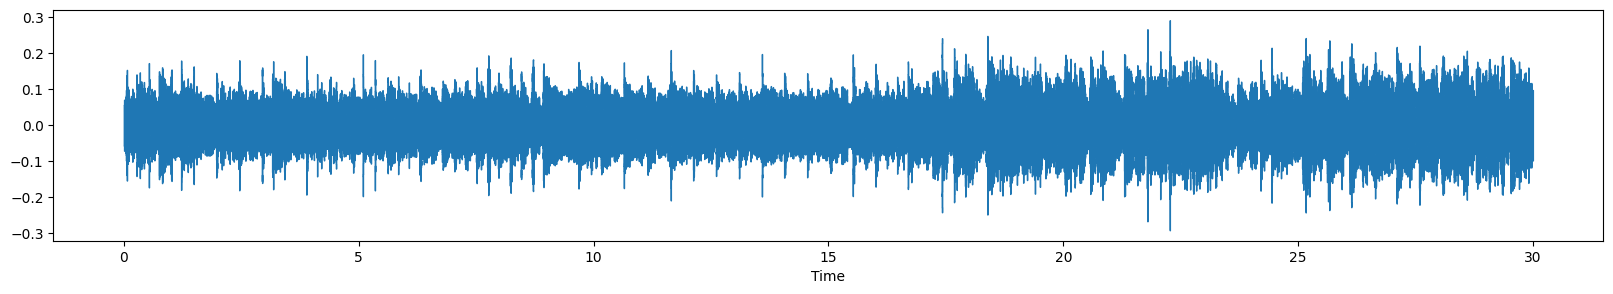

In [47]:

plt.figure(figsize = (20, 3))
librosa.display.waveshow(waw, sr = sample_rate)

Audio(metal)

In [70]:
def audio_feature_extractor(audio_file_path):
  audio, sample_rate = librosa.load(audio_file_path)
  mffccs = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc = 40)
  mffccs_scaled_features = np.mean(mffccs.T, axis = 0)
  return mffccs_scaled_features

In [88]:
audio_path = df[df['gener'] == 'metal'].iloc[0,0]
da = audio_feature_extractor(audio_path)

In [89]:
da

array([-201.1977    ,   76.78211   ,  -14.798453  ,   68.737755  ,
        -12.944738  ,   36.95659   ,  -10.983901  ,   23.68839   ,
        -12.268321  ,   16.671509  ,  -11.074647  ,   15.571094  ,
        -11.184892  ,   10.576072  ,   -3.8928413 ,    7.0756917 ,
         -9.829377  ,    2.664597  ,   -8.994469  ,   -2.2220018 ,
         -6.522078  ,   -1.0599345 ,   -1.3367819 ,    0.34440315,
         -4.8260517 ,   -5.037049  ,   -5.151112  ,   -2.0047321 ,
         -2.9902675 ,   -3.688249  ,   -1.2717831 ,   -2.1132853 ,
         -1.1122152 ,   -3.2139397 ,   -1.7292478 ,   -3.1897404 ,
         -2.680836  ,   -2.1065576 ,   -1.3161547 ,   -2.4045334 ],
      dtype=float32)

In [74]:
data = []
for file in df.file_path:
  data.append(audio_feature_extractor(file))

In [96]:
df['music'] = data

In [99]:
df = df[['music', 'gener']]
df

,music,gener
0,"[-111.659386, 121.75302, -3.1065454, 20.937916...",jazz
1,"[-69.57057, 125.992775, -5.1503735, 30.77484, ...",jazz
2,"[-246.96924, 168.01538, -19.797491, 21.995052,...",jazz
3,"[-340.92114, 89.82105, 44.52626, 28.849882, 16...",jazz
4,"[-91.53225, 82.66672, 12.093825, 36.692665, -0...",jazz
...,...,...
995,"[-28.989244, 104.531006, -30.983427, 38.162056...",blues
996,"[-86.491806, 92.72617, -15.342206, 54.05328, 0...",blues
997,"[-305.66434, 113.07102, 12.107334, 45.052197, ...",blues
998,"[-90.757164, 140.44087, -29.084547, 31.686693,...",blues


In [54]:
audio, sample_rate = librosa.load(metal)
audio

array([-0.00717163, -0.00680542,  0.00445557, ...,  0.00814819,
       -0.02844238, -0.02645874], dtype=float32)

In [48]:
mfccs = librosa.feature.mfcc(y = waw, sr = sample_rate, n_mfcc = 40)
mfccs

array([[-2.9869949e+02, -2.1480128e+02, -1.6288873e+02, ...,
        -2.0812970e+02, -2.0741249e+02, -2.3376866e+02],
       [ 1.1398623e+02,  9.6389008e+01,  8.5061829e+01, ...,
         1.3605316e+01,  1.3611492e+01,  1.7658955e+01],
       [-3.8863365e+01, -3.2077477e+01, -2.8482807e+01, ...,
         1.6288647e+01,  2.1833237e+01,  3.0776649e+01],
       ...,
       [-8.3483639e+00, -5.0256505e+00, -4.0281200e+00, ...,
        -4.0422554e+00, -3.6779985e+00, -2.5631969e+00],
       [-1.9422821e+00, -2.8727374e+00, -2.5050721e+00, ...,
         2.2528172e+00,  4.1866970e+00,  1.1091924e+01],
       [ 1.7768383e-01, -6.7186708e+00, -6.9268064e+00, ...,
         3.4535134e-01,  1.5339608e+00,  3.4700742e+00]], dtype=float32)

In [49]:
mfccs.shape

(40, 1293)

In [ ]:
file = tf.io.read_file(df['pop'][0])


In [ ]:
def read_waw_mono(file_path : str, rate_out : int = 16_000):
    file = tf.io.read_file(file_path)

    waw, sample_rate = tf.audio.decode_wav(file, desired_channels = 1)
    waw = tf.squeeze(waw, axis = 1)
    sample_rate = tf.cast(sample_rate, dtype = tf.int64) #changing data tensor 32 into tensor 64 type

    waw = tfio.audio.resample(waw, rate_in = sample_rate, rate_out = rate_out)
    return waw

In [ ]:
file = tf.io.read_file(df['metal'][0])
waw, sample_rate = tf.audio.decode_wav(file, desired_channels = 1)
waw = tf.squeeze(waw, axis = 1)
sample_rate = tf.cast(sample_rate, dtype = tf.int64)

waw

<tf.Tensor: shape=(661504,), dtype=float32, numpy=
array([-0.03897095, -0.06414795, -0.09539795, ..., -0.05166626,
       -0.0802002 , -0.05831909], dtype=float32)>

In [ ]:
pop = read_waw_mono(df['pop'][0])
metal = read_waw_mono(df['metal'][0])

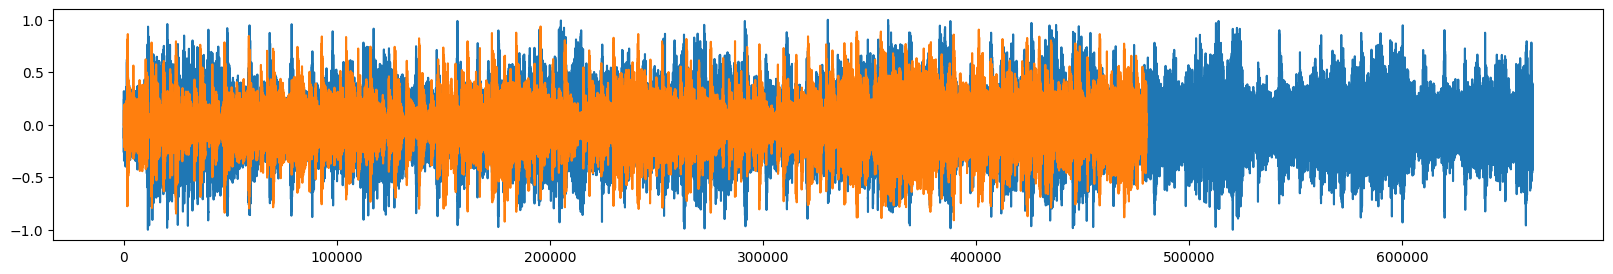

In [ ]:
plt.figure(figsize = (20, 3))
plt.plot(waw)
plt.plot(pop)
plt.show()